In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

In [ ]:
train = pd.read_csv('train.csv', nrows = 100000)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 29 columns):
Id                 100000 non-null object
groupId            100000 non-null object
matchId            100000 non-null object
assists            100000 non-null int64
boosts             100000 non-null int64
damageDealt        100000 non-null float64
DBNOs              100000 non-null int64
headshotKills      100000 non-null int64
heals              100000 non-null int64
killPlace          100000 non-null int64
killPoints         100000 non-null int64
kills              100000 non-null int64
killStreaks        100000 non-null int64
longestKill        100000 non-null float64
matchDuration      100000 non-null int64
matchType          100000 non-null object
maxPlace           100000 non-null int64
numGroups          100000 non-null int64
rankPoints         100000 non-null int64
revives            100000 non-null int64
rideDistance       100000 non-null float64
roadKills          

In [ ]:
train.head(10)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.000,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.470,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.000,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.900,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.000,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875
5,ff79c12f326506,289a6836a88d27,bac52627a12114,0,0,100.000,1,1,0,44,...,0,0.0000,0,0.00,0,0,34.70,1,0,0.0370
6,95959be0e21ca3,2c485a1ad3d0f1,a8274e903927a2,0,0,0.000,0,0,0,96,...,0,0.0000,0,0.00,0,0,13.50,1,1497,0.0000
7,311b84c6ff4390,eaba5fcb7fc1ae,292611730ca862,0,0,8.538,0,0,0,48,...,0,2004.0000,0,0.00,0,0,1089.00,6,1500,0.7368
8,1a68204ccf9891,47cfbb04e1b1a2,df014fbee741c6,0,0,51.600,0,0,0,64,...,0,0.0000,0,0.00,0,0,799.90,4,0,0.3704
9,e5bb5a43587253,759bb6f7514fd2,3d3031c795305b,0,0,37.270,0,0,0,74,...,0,0.0000,0,0.00,0,0,65.67,1,0,0.2143


In [ ]:
print("Average person kills {:2.4f} players".format(train['kills'].mean()))
print("99% of people have {} kills or less ".format(train['kills'].quantile(0.99)))
print("Most kills ever any player had - {}".format(train['kills'].max()))

Average person kills 0.9234 players
99% of people have 7.0 kills or less 
Most kills ever any player had - 35


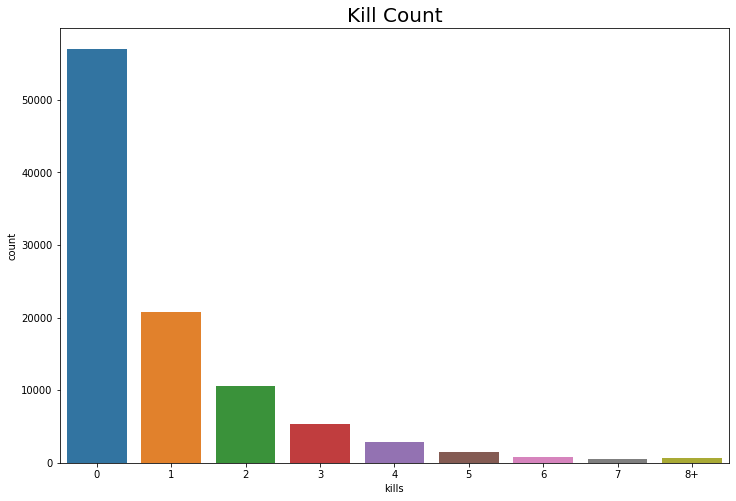

In [ ]:
# displaying kill count
data = train.copy()
# plotting 8+ for people who have killed more than 7 (only 1%)
data.loc[data['kills'] > data['kills'].quantile(0.99)] = '8+'
plt.figure(figsize=(12,8))
#bar graph
sns.countplot(data['kills'].astype('str').sort_values())
plt.title("Kill Count", fontsize=20)
plt.show()

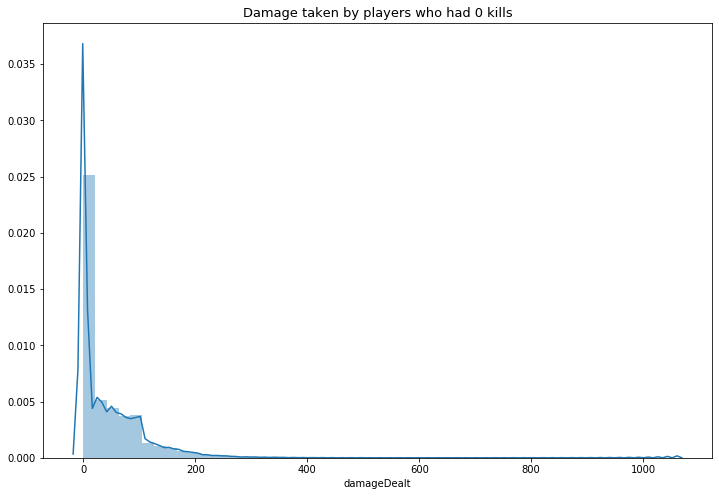

In [ ]:
# plotting damage taken by players with 0 kills
data = train.copy()
data = data[data['kills']==0]
plt.figure(figsize=(12,8))
plt.title("Damage taken by players who had 0 kills", fontsize = 13)
#histogram plot
sns.distplot(data['damageDealt'])
plt.show()

In [ ]:
wonWithoutKills = len(data[data['winPlacePerc']==1])
print("{} players i.e. {:.4f}% won without any kills!".format(wonWithoutKills, 100*wonWithoutKills/len(train)))

wonWithoutDamage = len(train[train['damageDealt'] == 0])
print("{} players i.e. {:.4f}% won without dealing any damage!".format(wonWithoutDamage, 100*wonWithoutDamage/len(train)))

387 players i.e. 0.3870% won without any kills!
27992 players i.e. 27.9920% won without dealing any damage!


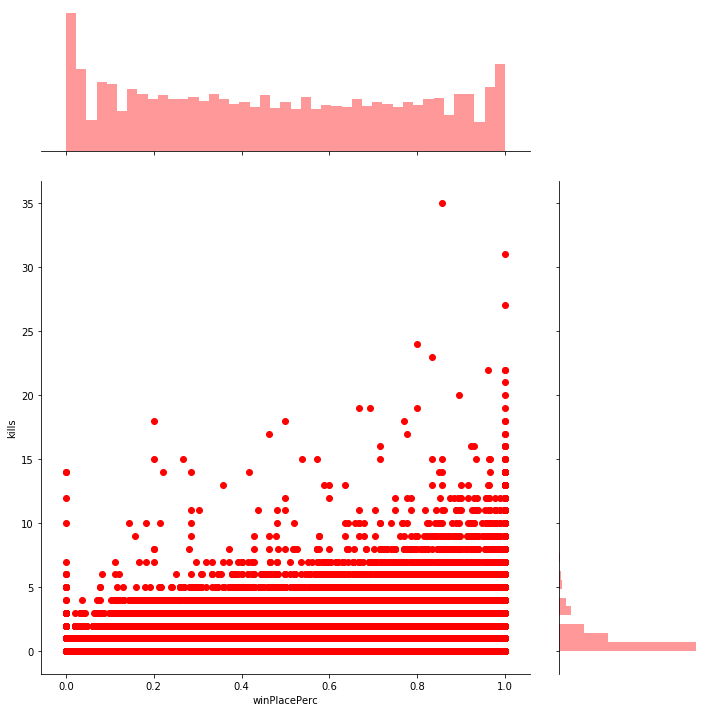

In [ ]:
# finding correlation of kills and winning place
sns.jointplot(x="winPlacePerc", y="kills", data=train, height=10, ratio=3, color='r')
plt.show()

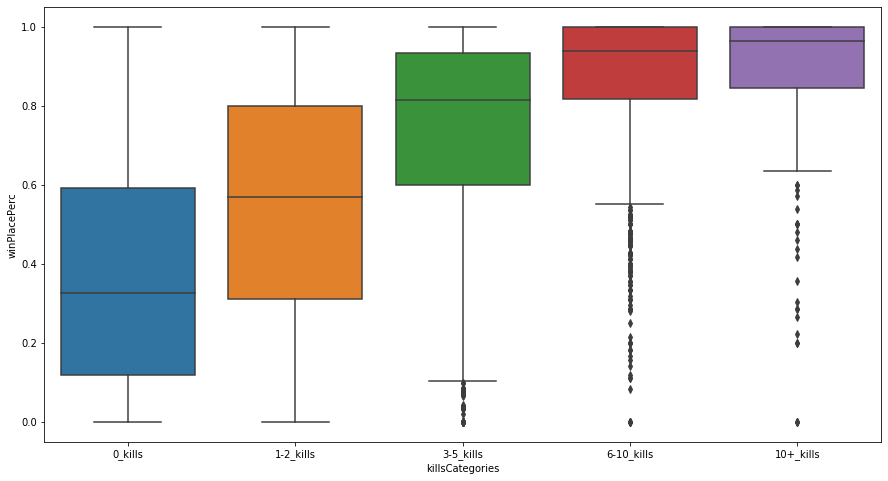

In [ ]:
# finding correlation of kills and winning place using boxplot
kills = train.copy()

kills['killsCategories'] = pd.cut(kills['kills'], [-1, 0, 2, 5, 10, 60], labels=['0_kills','1-2_kills', '3-5_kills', '6-10_kills', '10+_kills'])

plt.figure(figsize=(15,8))
sns.boxplot(x="killsCategories", y="winPlacePerc", data=kills)
plt.show()

In [ ]:
print("The average person walks for {:.1f}m, 99% of people have walked {:.2f}m or less, while the marathoner champion walked for {:.2f}m.".format(train['walkDistance'].mean(), train['walkDistance'].quantile(0.99), train['walkDistance'].max()))

The average person walks for 1158.9m, 99% of people have walked 4410.01m or less, while the marathoner champion walked for 13530.00m.


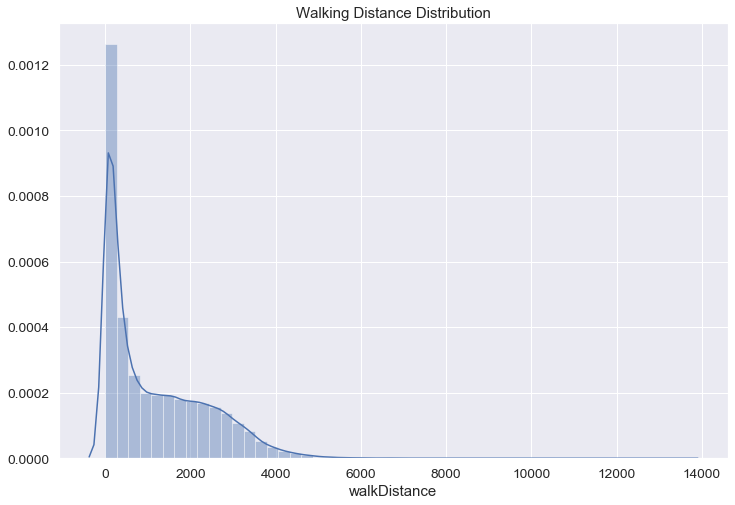

In [ ]:
#plotting walk distance of players in metres
data = train.copy()
plt.figure(figsize=(12,8))
plt.title("Walking Distance Distribution",fontsize=15)
sns.distplot(data['walkDistance'])
plt.show()

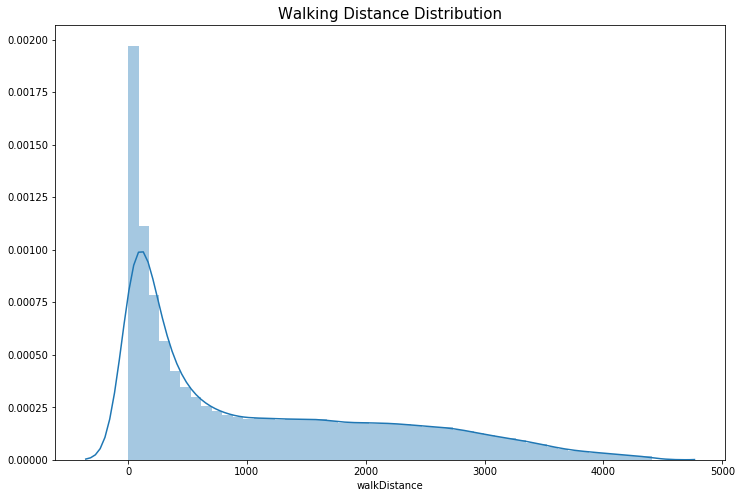

In [ ]:
#plotting walk distance of players in metres
data = train.copy()
data = data[data['walkDistance'] < train['walkDistance'].quantile(0.99)]
plt.figure(figsize=(12,8))
plt.title("Walking Distance Distribution",fontsize=15)
sns.distplot(data['walkDistance'])
plt.show()

In [ ]:
print("{} players ({:.4f}%) walked 0 meters. This means that they die before even taking a step or they are afk (more possible).".format(len(data[data['walkDistance'] == 0]), 100*len(data[data['walkDistance']==0])/len(train)))

2239 players (2.2390%) walked 0 meters. This means that they die before even taking a step or they are afk (more possible).


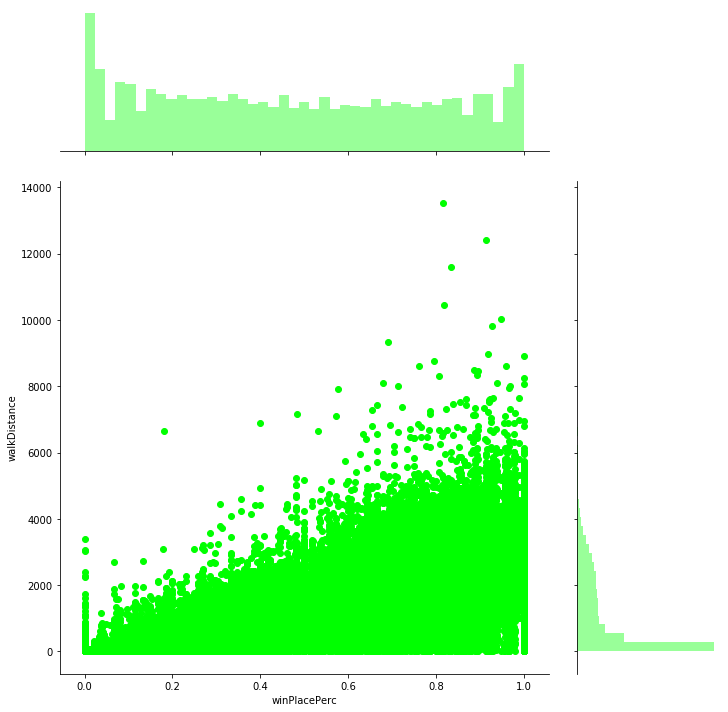

In [ ]:
# finding relation of walk distance and winning place
sns.jointplot(x="winPlacePerc", y="walkDistance",  data=train, height=10, ratio=3, color="lime")
plt.show()

In [ ]:
#Driving
print("The average person drives for {:.1f}m, 99% of people have drived {}m or less, while the champion drived for {}m.".format(train['rideDistance'].mean(), train['rideDistance'].quantile(0.99), train['rideDistance'].max()))

The average person drives for 604.0m, 99% of people have drived 6891.009999999995m or less, while the champion drived for 28450.0m.


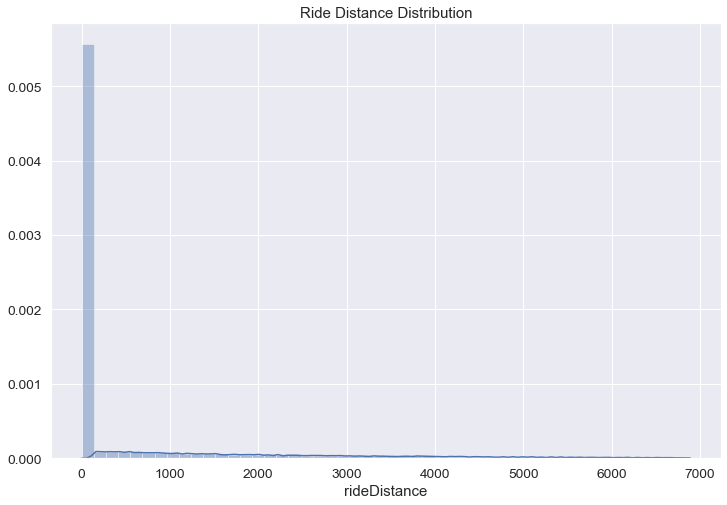

In [ ]:
# histogram of riding distance of players
data = train.copy()
data = data[data['rideDistance'] < train['rideDistance'].quantile(0.99)]
plt.figure(figsize=(12,8))
plt.title("Ride Distance Distribution",fontsize=15)
sns.distplot(data['rideDistance'])
plt.show()

In [ ]:
print("{} players ({:.4f}%) drived for 0 meters. This means that they don't drive at all.".format(len(data[data['rideDistance'] == 0]), 100*len(data[data['rideDistance']==0])/len(train)))

74488 players (74.4880%) drived for 0 meters. This means that they don't drive at all.


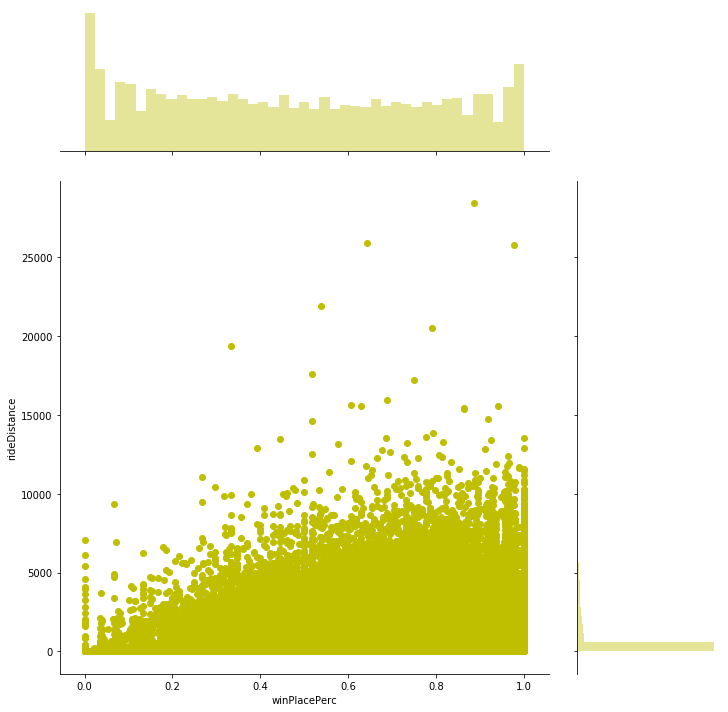

In [ ]:
# jointplot of winplace and riding distance
sns.jointplot(x="winPlacePerc", y="rideDistance", data=train, height=10, ratio=3, color="y")
plt.show()

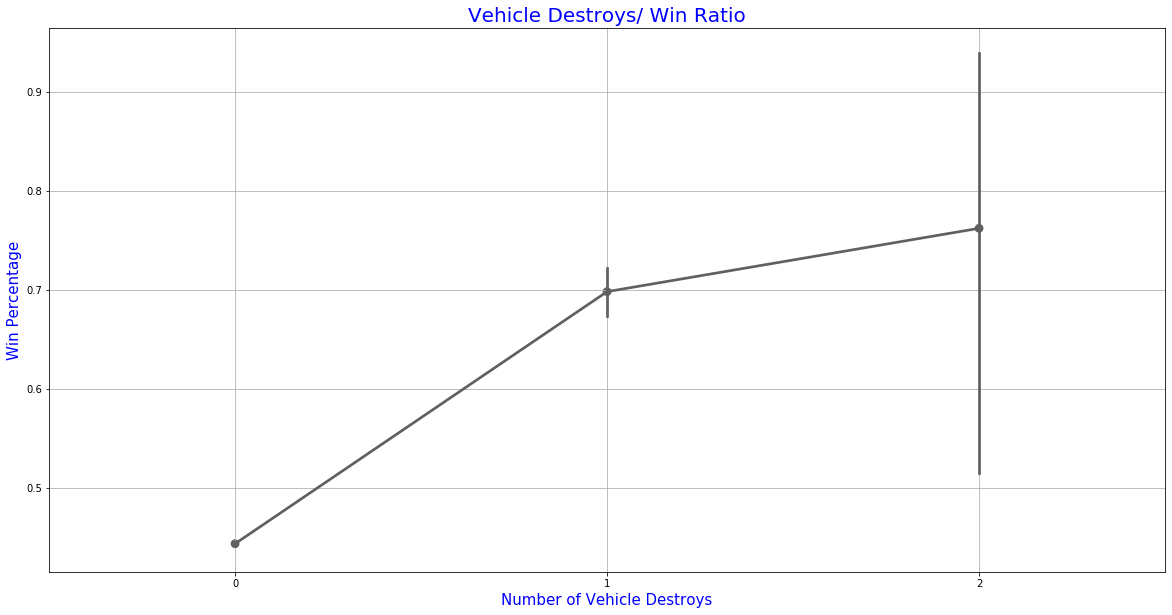

In [ ]:
# number of vehicle destroys done by a player
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='vehicleDestroys',y='winPlacePerc',data=data,color='#606060',alpha=0.8)
plt.xlabel('Number of Vehicle Destroys',fontsize = 15,color='blue')
plt.ylabel('Win Percentage',fontsize = 15,color='blue')
plt.title('Vehicle Destroys/ Win Ratio',fontsize = 20,color='blue')
plt.grid()
plt.show()

In [ ]:
print("The average person uses {:.1f} heal items, 99% of people use {} or less, while the max used is {}.".format(train['heals'].mean(), train['heals'].quantile(0.99), train['heals'].max()))
print("The average person uses {:.1f} boost items, 99% of people use {} or less, while the max used is {}.".format(train['boosts'].mean(), train['boosts'].quantile(0.99), train['boosts'].max()))

The average person uses 1.4 heal items, 99% of people use 12.0 or less, while the max used is 47.
The average person uses 1.1 boost items, 99% of people use 7.0 or less, while the max used is 21.


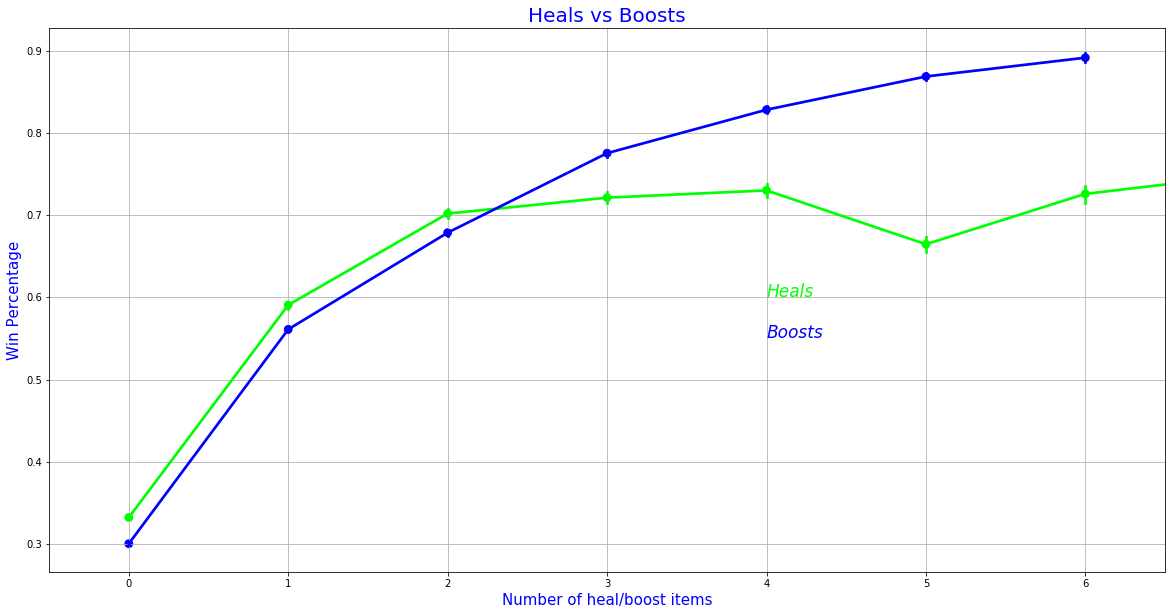

In [ ]:
# fiding use of heals and boosts compared with winning place
data = train.copy()
data = data[data['heals'] < data['heals'].quantile(0.99)]
data = data[data['boosts'] < data['boosts'].quantile(0.99)]


# pointplot is used
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='heals',y='winPlacePerc',data=data,color='lime',alpha=0.8)
sns.pointplot(x='boosts',y='winPlacePerc',data=data,color='blue',alpha=0.8)
plt.text(4,0.6,'Heals',color='lime',fontsize = 17,style = 'italic')
plt.text(4,0.55,'Boosts',color='blue',fontsize = 17,style = 'italic')
plt.xlabel('Number of heal/boost items',fontsize = 15,color='blue')
plt.ylabel('Win Percentage',fontsize = 15,color='blue')
plt.title('Heals vs Boosts',fontsize = 20,color='blue')
plt.grid()
plt.show()

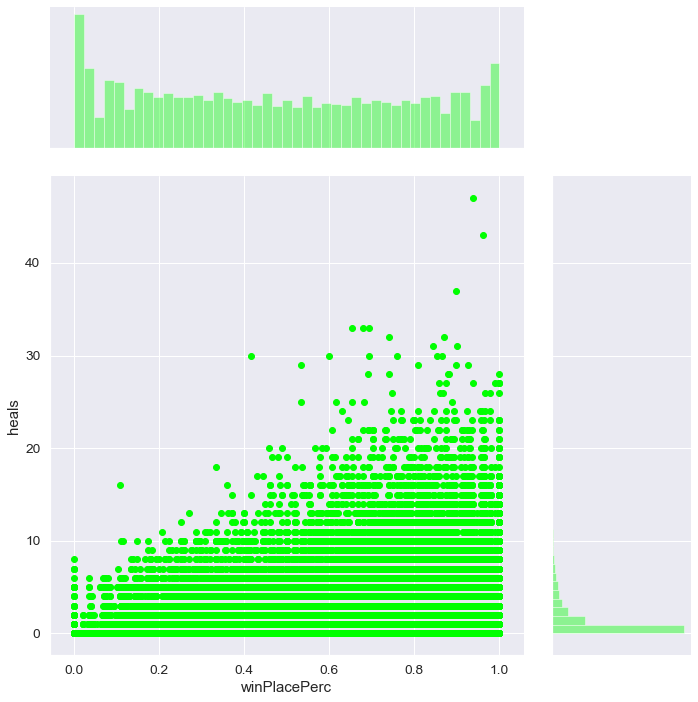

In [ ]:
# winplace with heals
sns.jointplot(x="winPlacePerc", y="heals", data=train, height=10, ratio=3, color="lime")
plt.show()

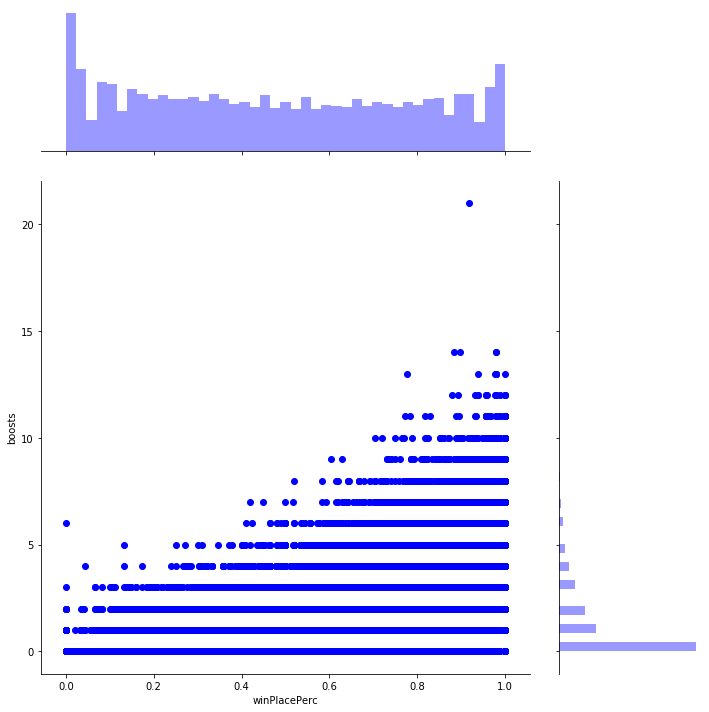

In [ ]:
# winplace with boosts
sns.jointplot(x="winPlacePerc", y="boosts", data=train, height=10, ratio=3, color="blue")
plt.show()

In [ ]:
solos = train[train['numGroups']>50]
duos = train[(train['numGroups']>25) & (train['numGroups']<=50)]
squads = train[train['numGroups']<=25]
print("There are {} ({:.2f}%) solo games, {} ({:.2f}%) duo games and {} ({:.2f}%) squad games.".format(len(solos), 100*len(solos)/len(train), len(duos), 100*len(duos)/len(train), len(squads), 100*len(squads)/len(train),))

There are 16004 (16.00%) solo games, 73922 (73.92%) duo games and 10074 (10.07%) squad games.


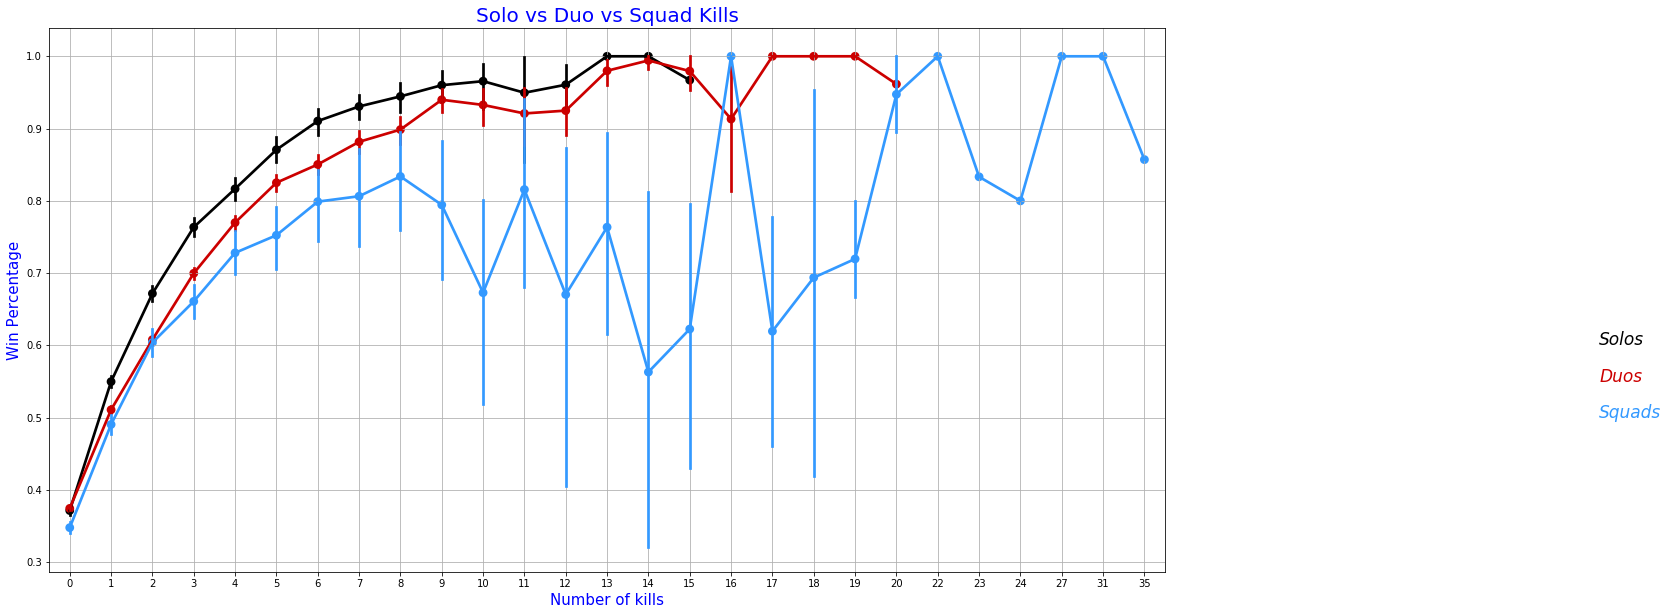

In [ ]:
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='kills',y='winPlacePerc',data=solos,color='black',alpha=0.8)
sns.pointplot(x='kills',y='winPlacePerc',data=duos,color='#CC0000',alpha=0.8)
sns.pointplot(x='kills',y='winPlacePerc',data=squads,color='#3399FF',alpha=0.8)
plt.text(37,0.6,'Solos',color='black',fontsize = 17,style = 'italic')
plt.text(37,0.55,'Duos',color='#CC0000',fontsize = 17,style = 'italic')
plt.text(37,0.5,'Squads',color='#3399FF',fontsize = 17,style = 'italic')
plt.xlabel('Number of kills',fontsize = 15,color='blue')
plt.ylabel('Win Percentage',fontsize = 15,color='blue')
plt.title('Solo vs Duo vs Squad Kills',fontsize = 20,color='blue')
plt.grid()
plt.show()

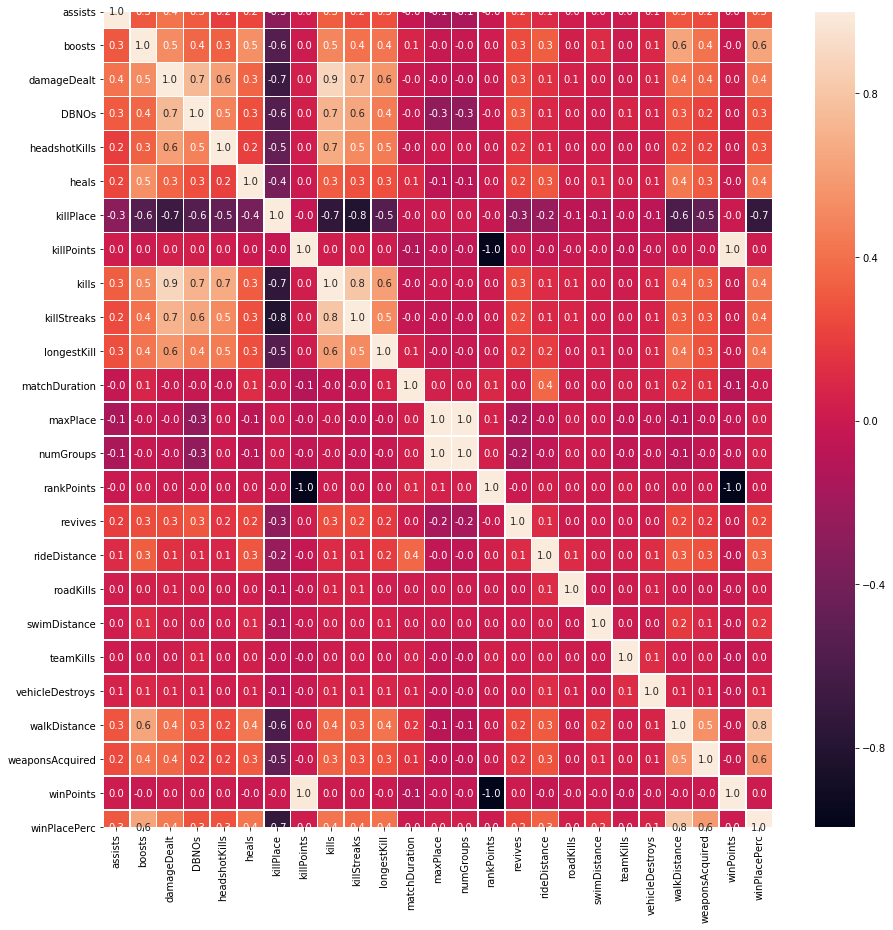

In [ ]:
#pearson correlation
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(train.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

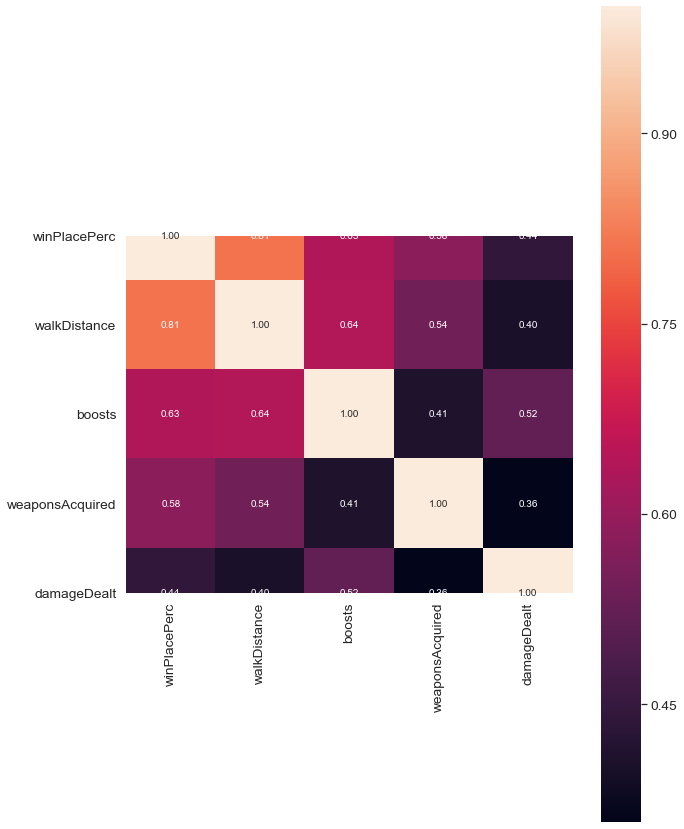

In [ ]:
k = 5 #number of variables for heatmap
f,ax = plt.subplots(figsize=(10, 15))
cols = train.corr().nlargest(k, 'winPlacePerc')['winPlacePerc'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
target = 'winPlacePerc'
trainData = train.copy()
x = trainData.drop(['Id','groupId','matchId','matchType',target], axis=1)

In [ ]:
x.head(1)

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints
0,0,0,0.0,0,0,0,60,1241,0,0,...,-1,0,0.0,0,0.0,0,0,244.8,1,1466


In [ ]:
y = train[target]
y.head(1)

0    0.4444
Name: winPlacePerc, dtype: float64

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtree=DecisionTreeRegressor(max_depth=3)

In [ ]:
dtree.fit(x,y)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [ ]:
dtree.score(x, y)

0.800148880562762